# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [32]:
#importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import seaborn as sns
from seaborn import load_dataset
import matplotlib.pyplot as plt

import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [54]:
#inicializando a base de dados
tips = load_dataset('tips')
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips['tip_pct'] = tips['tip'] / (tips['net_bill'])
tips[:2]

,total_bill,tip,sex,smoker,day,time,size,net_bill,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,15.98,0.063204
1,10.34,1.66,Male,No,Sun,Dinner,3,8.68,0.191244


In [29]:
#1
y, X = patsy.dmatrices('tip ~ net_bill + 1', tips)

In [28]:
#2
modelo = sm.OLS(y,X).fit()

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Fri, 11 Mar 2022   Prob (F-statistic):           5.02e-23
Time:                        15:25:58   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.000       0.999       1.662
net_bill       0.0993      0.009     10.980      0.000       0.082       0.117
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.942
Skew:                           0.754   Prob(JB):                     9.63e-14
Kurtosis:                       4.903   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
#3
reg = smf.ols('tip ~ net_bill', data = tips).fit()

tips['res'] = reg.resid

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Fri, 11 Mar 2022   Prob (F-statistic):           5.02e-23
Time:                        15:35:57   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.000       0.999       1.662
net_bill       0.0993      0.009     10.980      0.000       0.082       0.117
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.942
Skew:                           0.754   Prob(JB):                     9.63e-14
Kurtosis:                       4.903   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

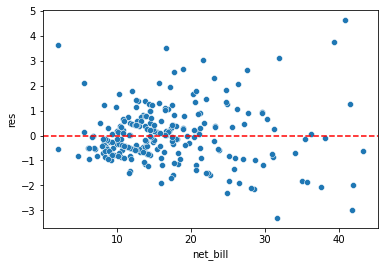

In [46]:
sns.scatterplot(x = 'net_bill', y = 'res', data = tips)
plt.axhline(y = 0, color = 'r', linestyle = '--')

### Utilizando o log

In [44]:
#4
reg = smf.ols('tip ~ np.log(net_bill)', data = tips).fit()

tips['res_log'] = reg.resid


reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     101.0
Date:                Fri, 11 Mar 2022   Prob (F-statistic):           4.40e-20
Time:                        15:36:08   Log-Likelihood:                -382.40
No. Observations:                 244   AIC:                             768.8
Df Residuals:                     242   BIC:                             775.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.2575      0.430     -2.924      0.004      -2.104      -0.410
np.log(net_bill)     1.5695      0.156     10.049      0.000       1.262       1.877
==============================================================================
Omnibus:                       73.945   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              221.148
Skew:                           1.303   Prob(JB):                     9.51e-49
Kurtosis:                       6.868   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

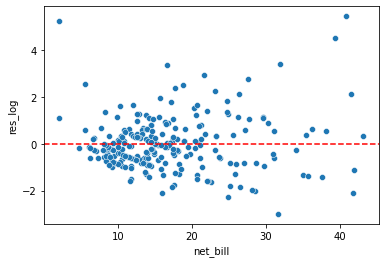

In [48]:
sns.scatterplot(x = 'net_bill', y = 'res_log', data = tips)
plt.axhline(y = 0, color = 'r', linestyle = '--')


### Polinômio

In [52]:
reg = smf.ols('tip ~ net_bill + np.power(net_bill,2)', data = tips).fit()

tips['res_pol'] = reg.resid
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     60.55
Date:                Fri, 11 Mar 2022   Prob (F-statistic):           4.96e-22
Time:                        15:45:11   Log-Likelihood:                -375.28
No. Observations:                 244   AIC:                             756.6
Df Residuals:                     241   BIC:                             767.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.0743      0.353      3.039      0.003       0.378       1.770
net_bill                  0.1288      0.037      3.493      0.001       0.056       0.202
np.power(net_bill, 2)    -0.0007      0.001     -0.825      0.410      -0.002       0.001
==============================================================================
Omnibus:                       39.745   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               77.849
Skew:                           0.830   Prob(JB):                     1.25e-17
Kurtosis:                       5.214   Cond. No.                     2.42e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

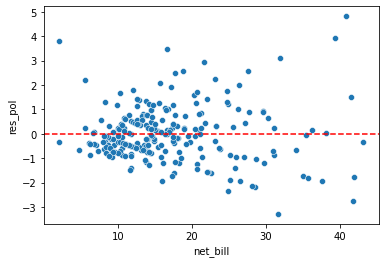

In [53]:
sns.scatterplot(x = 'net_bill', y = 'res_pol', data = tips)
plt.axhline(y = 0, color = 'r', linestyle = '--')

<p>A escolha é a do primeiro modelo, ambos ficaram bem parecidos, como é possível ver na análise de resíduos, mas o R-Quadrado do segundo(polinômio) modelo ficou melhor, que o primeiro com log.</p>

### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [56]:
# 1 - Criando a matriz
y, X = patsy.dmatrices('np.log(tip_pct) ~ sex + smoker + time + net_bill', tips)

In [60]:
y, X = patsy.dmatrices('np.log(tip_pct) ~ net_bill', tips)

In [59]:
# 2 - Verificando e removendo as variáveis não significantes
modelo = sm.OLS(y,X).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.log(tip_pct)   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     74.48
Date:                Fri, 11 Mar 2022   Prob (F-statistic):           8.27e-16
Time:                        15:54:35   Log-Likelihood:                -106.00
No. Observations:                 244   AIC:                             216.0
Df Residuals:                     242   BIC:                             223.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.2749      0.056    -22.872      0.000      -1.385      -1.165
net_bill      -0.0259      0.003     -8.630      0.000      -0.032      -0.020
==============================================================================
Omnibus:                       49.929   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              258.392
Skew:                           0.664   Prob(JB):                     7.78e-57
Kurtosis:                       7.864   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

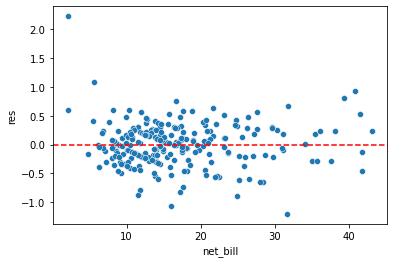

In [64]:
#3 - Visualizando o gráfico de resíduos
reg = smf.ols('np.log(tip_pct) ~ net_bill', data = tips).fit()
tips['res'] = reg.resid

sns.scatterplot(x = 'net_bill', y = 'res', data = tips)
plt.axhline(y = 0, color = 'r', linestyle = '--')

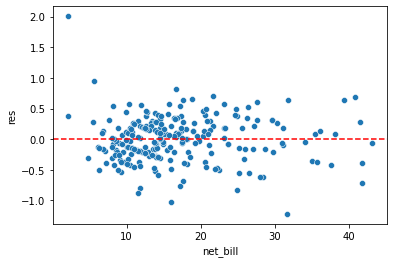

In [66]:
# 4 - Transformando em Polinômio e Log
reg = smf.ols('np.log(tip_pct) ~ net_bill + np.power(net_bill,2)', data = tips).fit()
tips['res'] = reg.resid

sns.scatterplot(x = 'net_bill', y = 'res', data = tips)
plt.axhline(y = 0, color = 'r', linestyle = '--')

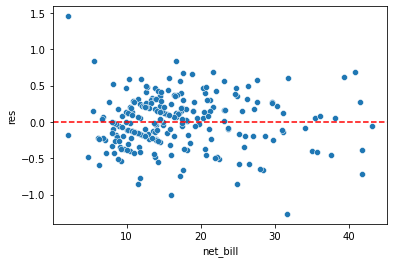

In [71]:
reg_final = smf.ols('np.log(tip_pct) ~ net_bill + np.log(net_bill)', data = tips).fit()
tips['res'] = reg_final.resid

sns.scatterplot(x = 'net_bill', y = 'res', data = tips)
plt.axhline(y = 0, color = 'r', linestyle = '--')

<p> 4 -  O modelo com o log de 'tip_pct' e 'net_bill', foi o que apresentou a melhor distribuição nos gráficos de visualização re resíduos.</p>

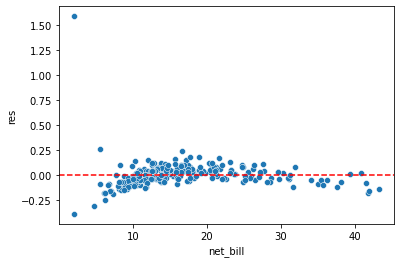

In [74]:
reg_final = smf.ols('tip_pct ~ net_bill + np.log(net_bill)', data = tips).fit()
tips['res'] = reg_final.resid

sns.scatterplot(x = 'net_bill', y = 'res', data = tips)
plt.axhline(y = 0, color = 'r', linestyle = '--')

In [75]:
#5 - Calculando R² do modelo final
tips['pred'] = np.exp(reg_final.fittedvalues)

tips[['pred', 'tip_pct']].corr().iloc[0,1]**2

0.4019126118366512

<p> O modelo final acabou tendo um R² maior, com o valor de 0.40</p>

### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [77]:
#1 - inicializando a base de dados
renda = pd.read_csv('previsao_de_renda.csv')
renda.head(2)

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14


In [99]:
# Modelo de regressão linear simples entre renda e tempo_emprego
reg = smf.ols('renda ~ tempo_emprego', data = renda).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.101
Model:                            OLS   Adj. R-squared:                  0.101
Method:                 Least Squares   F-statistic:                     1394.
Date:                Fri, 11 Mar 2022   Prob (F-statistic):          2.85e-289
Time:                        16:28:41   Log-Likelihood:                -14269.
No. Observations:               12466   AIC:                         2.854e+04
Df Residuals:                   12464   BIC:                         2.856e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 7.7492      0.013    603.989      0.000       7.724       7.774
np.log(tempo_emprego)     0.2489      0.007     37.333      0.000       0.236       0.262
==============================================================================
Omnibus:                        9.367   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.009   Jarque-Bera (JB):                9.357
Skew:                           0.062   Prob(JB):                      0.00929
Kurtosis:                       3.049   Cond. No.                         4.38
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

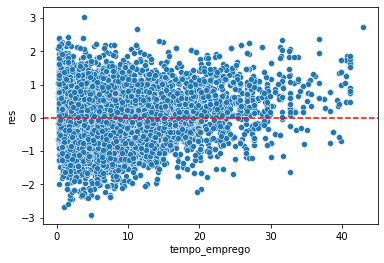

In [107]:
#2 - Análise de Resíduos
renda['res'] = reg.resid

sns.scatterplot(x = 'tempo_emprego', y = 'res', data = renda)
plt.axhline(y = 0, color = 'r', linestyle = '--')

<p> Tentaria através de um log na variável renda, e pelo gráfico de resíduos verificaria se o modelo teria ou não melhorado.</p>

In [108]:
renda.head(1)

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda,res,res_log
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24,0.056081,3185.490769


In [111]:
#3 - Iniciando a regressão linear múltipla
y, X = patsy.dmatrices('renda ~ sexo + posse_de_imovel + tipo_renda + educacao + tipo_residencia + idade + tempo_emprego', renda)

In [112]:
modelo = sm.OLS(y,X).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.220
Model:                            OLS   Adj. R-squared:                  0.219
Method:                 Least Squares   F-statistic:                     207.1
Date:                Fri, 11 Mar 2022   Prob (F-statistic):               0.00
Time:                        16:40:33   Log-Likelihood:            -1.2199e+05
No. Observations:               12466   AIC:                         2.440e+05
Df Residuals:                   12448   BIC:                         2.442e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                          432.6463    567.947      0.762      0.446    -680.618    1545.911
sexo[T.M]                         2358.8221     82.247     28.680      0.000    2197.606    2520.038
posse_de_imovel[T.True]            355.0585     83.220      4.266      0.000     191.934     518.183
tipo_renda[T.Bolsista]            -775.8018   2154.712     -0.360      0.719   -4999.370    3447.767
tipo_renda[T.Empresário]          1020.9113     89.915     11.354      0.000     844.665    1197.158
tipo_renda[T.Pensionista]         1730.3331   1436.724      1.204      0.228   -1085.868    4546.535
tipo_renda[T.Servidor público]     443.5468    130.381      3.402      0.001     187.980     699.113
educacao[T.Pós graduação]         2248.8260   1079.826      2.083      0.037     132.201    4365.451
educacao[T.Secundário]            -223.5394    437.294     -0.511      0.609   -1080.703     633.624
educacao[T.Superior completo]      346.4178    438.835      0.789      0.430    -513.767    1206.602
educacao[T.Superior incompleto]   -280.6189    470.409     -0.597      0.551   -1202.693     641.455
tipo_residencia[T.Casa]           -359.8667    328.193     -1.097      0.273   -1003.176     283.442
tipo_residencia[T.Com os pais]    -652.1512    368.203     -1.771      0.077   -1373.886      69.583
tipo_residencia[T.Comunitário]    -612.6789    633.683     -0.967      0.334   -1854.796     629.438
tipo_residencia[T.Estúdio]        -970.0785    546.744     -1.774      0.076   -2041.781     101.624
tipo_residencia[T.Governamental]  -881.8503    397.012     -2.221      0.026   -1660.054    -103.646
idade                               26.8971      4.511      5.963      0.000      18.055      35.739
tempo_emprego                      300.1017      6.127     48.977      0.000     288.091     312.112
==============================================================================
Omnibus:                    10072.162   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           431977.451
Skew:                           3.577   Prob(JB):                         0.00
Kurtosis:                      30.937   Cond. No.                     2.38e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.38e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<h3>4)</h3>

<p> Dentro de algumas variáveis que se tornaram dummies, o P>|t|, em algumas faz sentido, sendo menos que 5%, já outras não. </p>

In [124]:
#5 - Gráfico de Resíduos
reg = smf.ols('renda ~ sexo + posse_de_imovel + tipo_renda + educacao + tipo_residencia + idade + tempo_emprego', data = renda).fit()
renda['res_log'] = reg.resid

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.220
Model:                            OLS   Adj. R-squared:                  0.219
Method:                 Least Squares   F-statistic:                     207.1
Date:                Fri, 11 Mar 2022   Prob (F-statistic):               0.00
Time:                        16:50:49   Log-Likelihood:            -1.2199e+05
No. Observations:               12466   AIC:                         2.440e+05
Df Residuals:                   12448   BIC:                         2.442e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                          432.6463    567.947      0.762      0.446    -680.618    1545.911
sexo[T.M]                         2358.8221     82.247     28.680      0.000    2197.606    2520.038
posse_de_imovel[T.True]            355.0585     83.220      4.266      0.000     191.934     518.183
tipo_renda[T.Bolsista]            -775.8018   2154.712     -0.360      0.719   -4999.370    3447.767
tipo_renda[T.Empresário]          1020.9113     89.915     11.354      0.000     844.665    1197.158
tipo_renda[T.Pensionista]         1730.3331   1436.724      1.204      0.228   -1085.868    4546.535
tipo_renda[T.Servidor público]     443.5468    130.381      3.402      0.001     187.980     699.113
educacao[T.Pós graduação]         2248.8260   1079.826      2.083      0.037     132.201    4365.451
educacao[T.Secundário]            -223.5394    437.294     -0.511      0.609   -1080.703     633.624
educacao[T.Superior completo]      346.4178    438.835      0.789      0.430    -513.767    1206.602
educacao[T.Superior incompleto]   -280.6189    470.409     -0.597      0.551   -1202.693     641.455
tipo_residencia[T.Casa]           -359.8667    328.193     -1.097      0.273   -1003.176     283.442
tipo_residencia[T.Com os pais]    -652.1512    368.203     -1.771      0.077   -1373.886      69.583
tipo_residencia[T.Comunitário]    -612.6789    633.683     -0.967      0.334   -1854.796     629.438
tipo_residencia[T.Estúdio]        -970.0785    546.744     -1.774      0.076   -2041.781     101.624
tipo_residencia[T.Governamental]  -881.8503    397.012     -2.221      0.026   -1660.054    -103.646
idade                               26.8971      4.511      5.963      0.000      18.055      35.739
tempo_emprego                      300.1017      6.127     48.977      0.000     288.091     312.112
==============================================================================
Omnibus:                    10072.162   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           431977.451
Skew:                           3.577   Prob(JB):                         0.00
Kurtosis:                      30.937   Cond. No.                     2.38e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.38e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<AxesSubplot:xlabel='sexo', ylabel='res_log'>

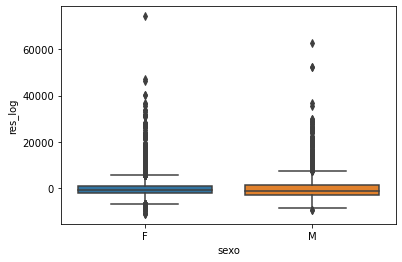

In [126]:
sns.boxplot(x = 'sexo', y = 'res_log', data = renda)

<AxesSubplot:xlabel='posse_de_imovel', ylabel='res_log'>

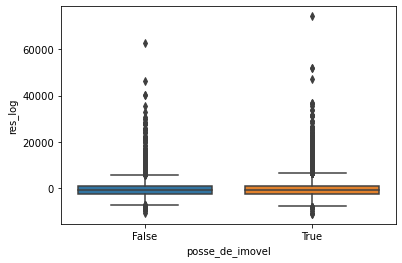

In [127]:
sns.boxplot(x = 'posse_de_imovel', y = 'res_log', data = renda)

<AxesSubplot:xlabel='tipo_renda', ylabel='res_log'>

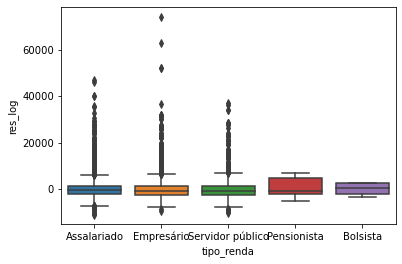

In [128]:
sns.boxplot(x = 'tipo_renda', y = 'res_log', data = renda)

<AxesSubplot:xlabel='educacao', ylabel='res_log'>

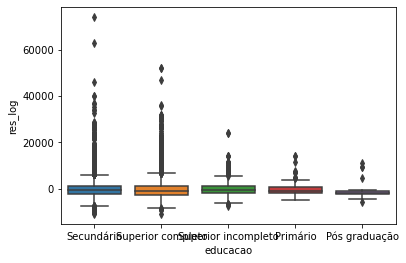

In [129]:
sns.boxplot(x = 'educacao', y = 'res_log', data = renda)

<AxesSubplot:xlabel='tipo_residencia', ylabel='res_log'>

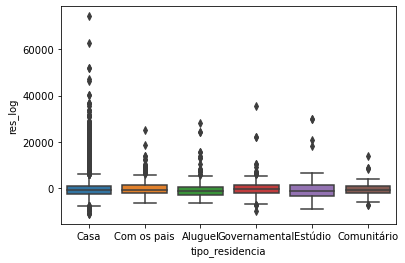

In [130]:
sns.boxplot(x = 'tipo_residencia', y = 'res_log', data = renda)

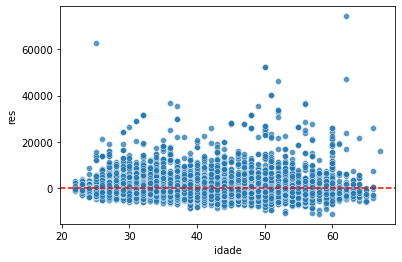

In [140]:
sns.scatterplot(x = 'idade', y = 'res', data = renda, alpha = .75)
plt.axhline(y = 0, color = 'r', linestyle = '--')

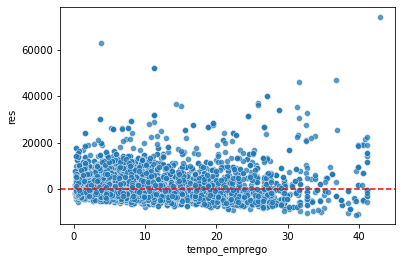

In [141]:
sns.scatterplot(x = 'tempo_emprego', y = 'res', data = renda, alpha = .75)
plt.axhline(y = 0, color = 'r', linestyle = '--')

<p>As únicas variáveis que mostraram úteis foram tempo_emprego e idade, porém necessitam de alguns ajustes, para que a distribuição no gráfico fique melhor, como a remoção de alguns outliers.<p/>